#<font color='blue'>**Caso de uso: Carlos Avilés Tapia**</font>
##***Título: Evolución de delitos de mayor connotación social***

  Se compara gráficamente la evolución de algunos delitos de mayor connotación social para Chile y sudamérica.

  Se usan datos extraídos de la página de la [Organización de las Naciones Unidas](https://data.un.org/)  sobre este tipo de delitos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Definición de estilo de seaborn.
sns.set(context='notebook',style='darkgrid',palette='dark')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ruta al archivo CSV.
ruta_archivo = '/content/drive/MyDrive/Archivos/SYB65_328_202209_Intentional homicides and other crimes.csv'

# Carga el archivo CSV en un DataFrame.
df_delitos = pd.read_csv(ruta_archivo, skiprows = 1)

# Se renombra la columna para el país.
df_delitos = df_delitos.rename(columns={'Unnamed: 1': 'Country'})

df_delitos.sample(5)


,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
214,53,Australia and New Zealand,2015,"Intentional homicide rates per 100,000",1.0,Estimate.,United Nations Office on Drugs and Crime (UNOD...
3511,604,Peru,2015,Percentage of male and female intentional homi...,2.6,NaN,United Nations Office on Drugs and Crime (UNOD...
1988,308,Grenada,2015,"Robbery at the national level, rate per 100,00...",69.3,NaN,United Nations Office on Drugs and Crime (UNOD...
2539,398,Kazakhstan,2020,Percentage of male and female intentional homi...,5.0,NaN,United Nations Office on Drugs and Crime (UNOD...
163,154,Northern Europe,2010,"Intentional homicide rates per 100,000",1.5,Estimate.,United Nations Office on Drugs and Crime (UNOD...


In [ ]:
df_delitos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  4865 non-null   int64 
 1   Country              4865 non-null   object
 2   Year                 4865 non-null   int64 
 3   Series               4865 non-null   object
 4   Value                4865 non-null   object
 5   Footnotes            216 non-null    object
 6   Source               4865 non-null   object
dtypes: int64(2), object(5)
memory usage: 266.2+ KB


In [ ]:
# Se formatean algunas columnas para facilitar la visualización.
# Se formatea la columna Year con formato de fecha.
df_delitos['Year'] = pd.to_datetime(df_delitos['Year'], format='%Y')

# Se formatea la columna Value para que los valores sean númericos y de tipo float.
df_delitos['Value'] = df_delitos['Value'].str.replace(',', '').astype(float)
df_delitos.loc[:, 'Value'] = pd.to_numeric(df_delitos['Value'])


In [ ]:
# Se filtran los datos para Chile.
datos_chile = df_delitos[df_delitos['Country'] == 'Chile']
datos_chile.sample(5)


,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
1196,152,Chile,2015-01-01,"Kidnapping at the national level, rate per 100...",1.6,NaN,United Nations Office on Drugs and Crime (UNOD...
1194,152,Chile,2015-01-01,Percentage of male and female intentional homi...,0.8,NaN,United Nations Office on Drugs and Crime (UNOD...
1187,152,Chile,2010-01-01,"Assault rate per 100,000 population",130.5,NaN,United Nations Office on Drugs and Crime (UNOD...
1183,152,Chile,2005-01-01,"Robbery at the national level, rate per 100,00...",400.9,NaN,United Nations Office on Drugs and Crime (UNOD...
1193,152,Chile,2015-01-01,Percentage of male and female intentional homi...,6.0,NaN,United Nations Office on Drugs and Crime (UNOD...


In [ ]:
# Se verifican los tipos de delito incluídos para Chile.
datos_chile['Series'].unique()


array(['Intentional homicide rates per 100,000',
       'Percentage of male and female intentional homicide victims, Male',
       'Percentage of male and female intentional homicide victims, Female',
       'Kidnapping at the national level, rate per 100,000',
       'Theft at the national level, rate per 100,000 population',
       'Robbery at the national level, rate per 100,000 population',
       'Assault rate per 100,000 population',
       'Total Sexual Violence at the national level, rate per 100,000'],
      dtype=object)

In [ ]:
# Se filtran los delitos para usar en los gráficos.
homicidios_chile = datos_chile[datos_chile['Series'] == 'Intentional homicide rates per 100,000']
violencia_sexual_chile = datos_chile[datos_chile['Series'] == 'Total Sexual Violence at the national level, rate per 100,000']
hurtos_chile = datos_chile[datos_chile['Series'] == 'Theft at the national level, rate per 100,000 population']
robos_chile = datos_chile[datos_chile['Series'] == 'Robbery at the national level, rate per 100,000 population']
asaltos_chile = datos_chile[datos_chile['Series'] == 'Assault rate per 100,000 population']
secuestros_chile = datos_chile[datos_chile['Series'] == 'Kidnapping at the national level, rate per 100,000']


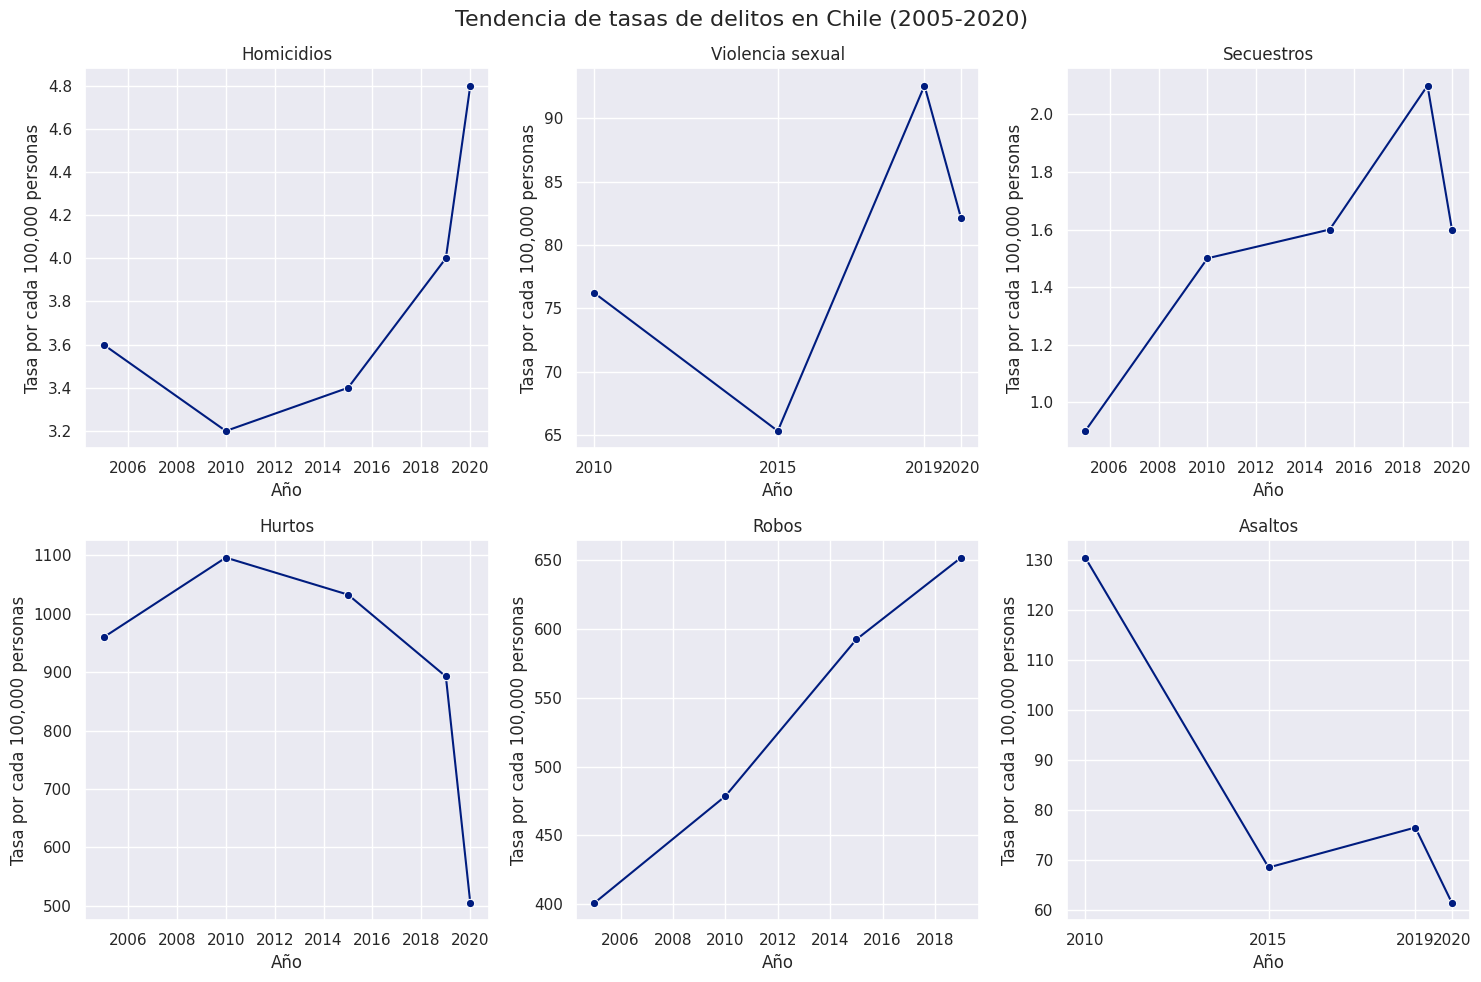

In [ ]:
# Se importa el módulo de dates para trabajar con fechas.
import matplotlib.dates as mdates

# Se genera un subplot para graficar los 6 delitos seleccionados.
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Gráfico 1: Homicidios.
sns.lineplot(data=homicidios_chile, x='Year', y='Value', marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Homicidios')
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Tasa por cada 100,000 personas')

# Gráfico 2: Violencia sexual.
sns.lineplot(data=violencia_sexual_chile, x='Year', y='Value', marker='o', ax=axs[0, 1])
años_con_datos = violencia_sexual_chile['Year'].tolist()
axs[0, 1].set_title('Violencia sexual')
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Tasa por cada 100,000 personas')
axs[0, 1].set_xticks(años_con_datos)
axs[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Gráfico 3: Secuestros.
sns.lineplot(data=secuestros_chile, x='Year', y='Value', marker='o', ax=axs[0, 2])
axs[0, 2].set_title('Secuestros')
axs[0, 2].set_xlabel('Año')
axs[0, 2].set_ylabel('Tasa por cada 100,000 personas')

# Gráfico 4: Hurtos.
sns.lineplot(data=hurtos_chile, x='Year', y='Value', marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Hurtos')
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Tasa por cada 100,000 personas')

# Gráfico 5: Robos.
sns.lineplot(data=robos_chile, x='Year', y='Value', marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Robos')
axs[1, 1].set_xlabel('Año')
axs[1, 1].set_ylabel('Tasa por cada 100,000 personas')

# Gráfico 6: Asaltos.
sns.lineplot(data=asaltos_chile, x='Year', y='Value', marker='o', ax=axs[1, 2])
años_con_datos = asaltos_chile['Year'].tolist()
axs[1, 2].set_title('Asaltos')
axs[1, 2].set_xlabel('Año')
axs[1, 2].set_ylabel('Tasa por cada 100,000 personas')
axs[1, 2].set_xticks(años_con_datos)
axs[1, 2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.suptitle('Tendencia de tasas de delitos en Chile (2005-2020)', fontsize=16)
plt.tight_layout()
plt.show()


Nota explicativa:

Hurto: apropiación de algo ajeno sin violencia.

Robo: apropiación de algo ajeno con violencia.

Asalto: uso de violencia con intención de dañar a otra persona.

Si bien la historicidad de los datos no es la ideal como para identificar patrones, es posible ver una tendencia en los homicidios y en los robos con un alza sostenida en las mediciones.

Por otro lado, el resto de los delitos contra la propiedad presentan una tendencia a la baja, sin embargo esto es complejo de analizar puesto que esta clase de delitos entran dentro de lo que se conoce como la "cifra negra" que es la cantidad desconocida de delitos que no son denunciados (por diversas razones, desde lo institucional a lo más subjetivo) y que, por lo tanto, no figuran como datos.

Por último, los delitos relacionados a la violencia sexual y al secuestro son inconsistentes como para analizar en profundidad.

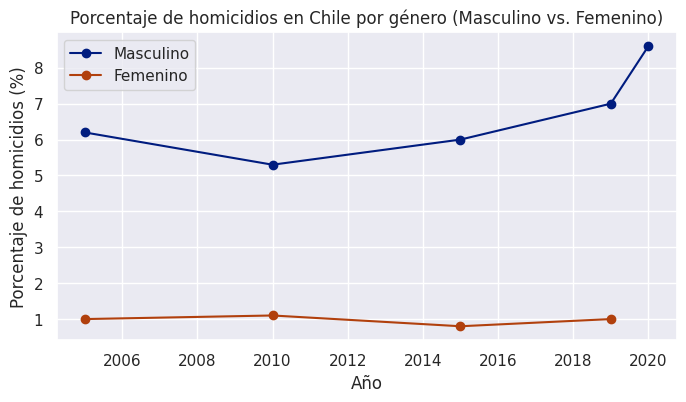

In [ ]:
# Se filtran los datos para los homicidios por género.
homicidios_hombres = datos_chile[datos_chile['Series'] == 'Percentage of male and female intentional homicide victims, Male']
homicidios_mujeres = datos_chile[datos_chile['Series'] == 'Percentage of male and female intentional homicide victims, Female']

# Se crea un gráficos de líneas comparativo.
plt.figure(figsize=(8, 4))
plt.plot(homicidios_hombres['Year'], homicidios_hombres['Value'], label='Masculino', marker='o')
plt.plot(homicidios_mujeres['Year'], homicidios_mujeres['Value'], label='Femenino', marker='o')
plt.xlabel('Año')
plt.ylabel('Porcentaje de homicidios (%)')
plt.title('Porcentaje de homicidios en Chile por género (Masculino vs. Femenino)')

plt.legend()
plt.show()


En cuanto a los homicidios se ve una brecha sistemática por género en la mayoría de las mediciones.

In [ ]:
# Se crea un listado de países de sudamérica para realizar una comparación con Chile.
paises_sudamerica = ['Argentina', 'Bolivia (Plurin. State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
                      'Paraguay', 'Peru', 'Uruguay', 'Venezuela (Boliv. Rep. of)']

df_sudamerica = df_delitos[df_delitos['Country'].isin(paises_sudamerica)]
df_sudamerica.sample(5)


,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
3470,600,Paraguay,2015-01-01,"Kidnapping at the national level, rate per 100...",0.0,NaN,United Nations Office on Drugs and Crime (UNOD...
1311,170,Colombia,2015-01-01,"Assault rate per 100,000 population",368.5,NaN,United Nations Office on Drugs and Crime (UNOD...
1306,170,Colombia,2010-01-01,"Robbery at the national level, rate per 100,00...",135.9,NaN,United Nations Office on Drugs and Crime (UNOD...
1322,170,Colombia,2017-01-01,"Total Sexual Violence at the national level, r...",48.7,NaN,United Nations Office on Drugs and Crime (UNOD...
3517,604,Peru,2018-01-01,"Intentional homicide rates per 100,000",7.7,NaN,United Nations Office on Drugs and Crime (UNOD...


In [ ]:
# Se filtran los homicidios de Sudamérica.
homicidios_sudam = df_sudamerica[df_sudamerica['Series'] == 'Intentional homicide rates per 100,000']


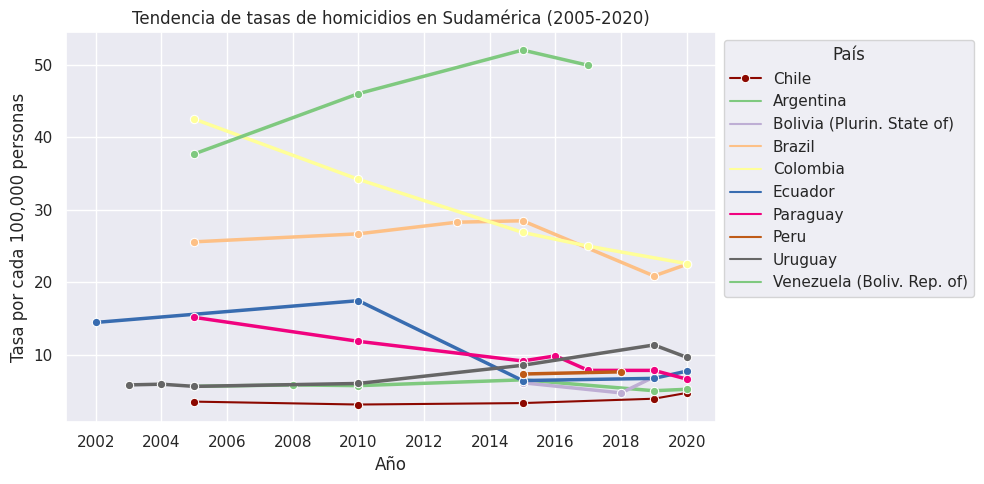

In [ ]:
plt.figure(figsize=(10, 5))

# Se filtran los datos para el resto de países de Sudamérica.
homicidios_sin_chile = homicidios_sudam[homicidios_sudam['Country'] != 'Chile']

# Se crea el gráfico de líneas para Chile.
sns.lineplot(data=homicidios_chile, x='Year', y='Value', marker='o', label='Chile', color='r')

# Se crea el gráfico de líneas para otros países de Sudamérica.
sns.lineplot(data=homicidios_sin_chile, x='Year', y='Value', hue='Country', marker='o', linewidth=2.5, palette='Accent')

plt.title('Tendencia de tasas de homicidios en Sudamérica (2005-2020)')
plt.xlabel('Año')
plt.ylabel('Tasa por cada 100,000 personas')
plt.legend(title='País', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()


En general, si se compara con el resto de Sudamérica, Chile presenta históricamente la menor tasa de homicidios de la región. Si bien en Chile se ha experimentado un alza sostenida, esta aun es baja en comparación con el resto de países.

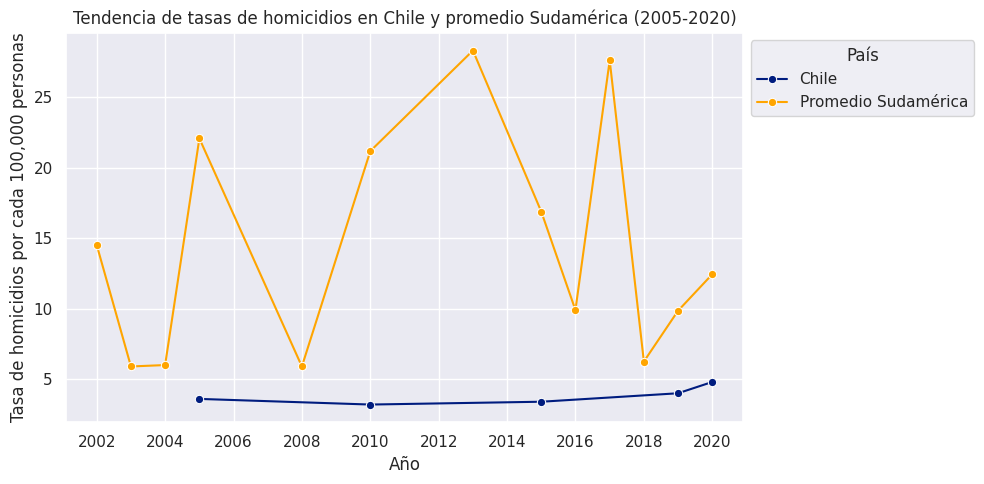

In [ ]:
# Se calcula el promedio de las tasas de homicidios en Sudamérica para cada año.
promedio_sudam = homicidios_sin_chile.groupby('Year')['Value'].mean().reset_index()

plt.figure(figsize=(10, 5))

# Gráfico de líneas para Chile.
sns.lineplot(data=homicidios_chile, x='Year', y='Value', marker='o', label='Chile')

# Gráfico de líneas para el promedio de Sudamérica.
sns.lineplot(data=promedio_sudam, x='Year', y='Value', marker='o', label='Promedio Sudamérica', color='orange')

plt.title('Tendencia de tasas de homicidios en Chile y promedio Sudamérica (2005-2020)')
plt.xlabel('Año')
plt.ylabel('Tasa de homicidios por cada 100,000 personas')
plt.legend(title='País', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()


Solo para simplificar la visualización, se usa el promedio de homicidios por año en Sudamérica para comparar con Chile.

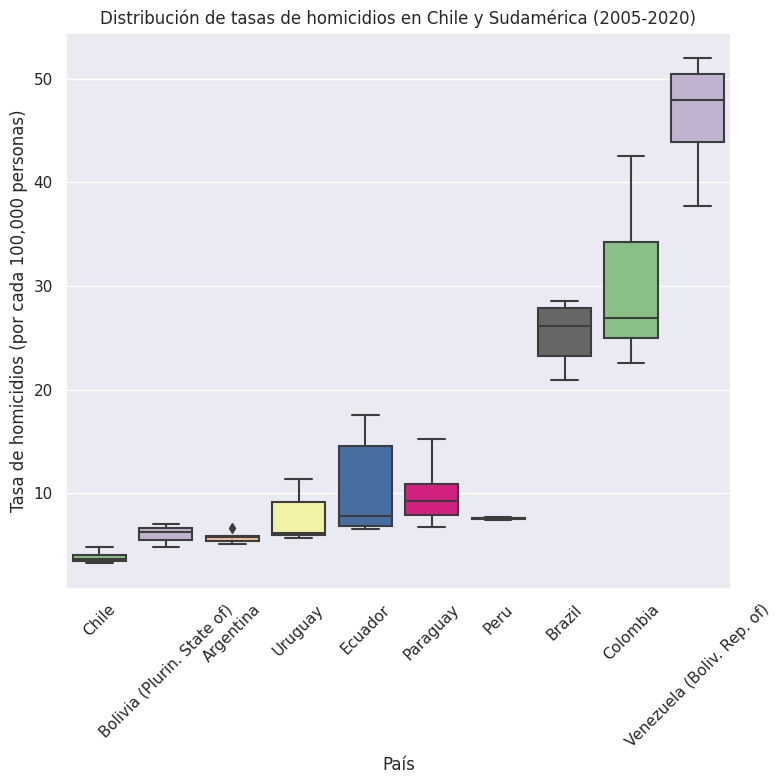

In [ ]:
# Comparación de distribuciones por año de homicidios en Sudamérica.
plt.figure(figsize=(8, 8))

# Se ordenan los valores para mostrar el gráfico.
homicidios_sudam_sorted = homicidios_sudam.sort_values('Value')

# Se crea el gráfico de cajas.
sns.boxplot(data=homicidios_sudam_sorted, x='Country', y='Value', palette='Accent')

plt.title('Distribución de tasas de homicidios en Chile y Sudamérica (2005-2020)')
plt.xlabel('País')
plt.ylabel('Tasa de homicidios (por cada 100,000 personas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El gráfico compara las distribuciones por año para los homicidios en países de Sudamérica.

En primer lugar, la cercanía con el eje x implica una cantidad menor de homicidios y la lejanía del eje x una cantidad mayor. Así, se tiene a Chile como la caja más cercana al eje x puesto que el país con menores tasas de homicidios al contrario de Venezuela que es la caja más alejada y que presenta las mayores tasas de homicidios.

En segundo lugar, la extensión de la caja se relaciona directamente con la dispersión de las mediciones. Así, mientras más alta la caja, mayor dispersión en las mediciones entre los diferentes años. En tanto que mientras más baja es la caja, las mediciones tienden a ser constantes entre los diferentes años.

Por último, es necesario recordar que esto solamente es una visualización de datos y que se requieren más datos para poder indagar en las causas de todas las distribuciones mostradas en el presente caso de uso.